In [1]:
from mtcnn.mtcnn import MTCNN

Using TensorFlow backend.


In [8]:
import os
from PIL import Image
import numpy as np

In [63]:
import cv2

In [3]:
LOCATION = '../humans_of_paris/app/static/images/'
pictures = os.listdir(LOCATION)

In [4]:
model = MTCNN()

Instructions for updating:
Colocations handled automatically by placer.


In [10]:
f = []
for pic in pictures:
    image = Image.open(LOCATION + pic)
    img = np.array(image)
    faces = model.detect_faces(img)
    f.append(faces)

In [15]:
for index, i in enumerate(f):
    if len(i) == 0:
        i.append({'source': pictures[index]})
    i[0]['source']= pictures[index]

In [23]:
f2 = [i[0] for i in f]

In [18]:
import pandas as pd

In [26]:
df_faces = pd.DataFrame(f2)

In [36]:
df_faces.source.sort_values().to_csv('data/images.csv')

/Users/lguillain/opt/anaconda3/envs/fdh/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  """Entry point for launching an IPython kernel.


/Users/lguillain/opt/anaconda3/envs/fdh/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='hist')` instead of `Series.plot('hist',)`.
  """Entry point for launching an IPython kernel.


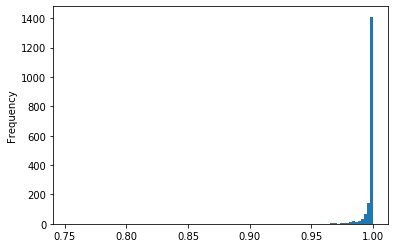

In [31]:
df_faces.confidence.plot('hist', bins=100)

In [29]:
len(df_faces[df_faces.box.isna()].source)

59

In [38]:
df_faces[df_faces.box.isna()].source

1       btv1b530503321.jpg
3       btv1b53081569f.jpg
4       btv1b530659097.jpg
20      btv1b53050893v.jpg
93      btv1b530803018.jpg
102     btv1b53107865n.jpg
122     btv1b53100728j.jpg
146     btv1b531690208.jpg
147     btv1b531390941.jpg
264     btv1b530505193.jpg
301     btv1b53170703n.jpg
369     btv1b53050561k.jpg
393     btv1b531007328.jpg
423     btv1b53117515r.jpg
488     btv1b53156013v.jpg
489     btv1b53065937k.jpg
491     btv1b53100735m.jpg
517     btv1b53118796m.jpg
561     btv1b53050620v.jpg
570     btv1b53050335c.jpg
587     btv1b531009215.jpg
605     btv1b531471763.jpg
722     btv1b531173635.jpg
734     btv1b531173813.jpg
759     btv1b53050726x.jpg
826     btv1b531007362.jpg
919     btv1b53092363n.jpg
933     btv1b53144536x.jpg
957     btv1b531714405.jpg
973     btv1b53050818s.jpg
987     btv1b53080074c.jpg
1074    btv1b530504220.jpg
1084    btv1b53050681s.jpg
1193    btv1b53080257n.jpg
1203    btv1b53155955g.jpg
1262    btv1b531189397.jpg
1264    btv1b53187715p.jpg
1

In [33]:
import matplotlib.pyplot as plt
%matplotlib inline

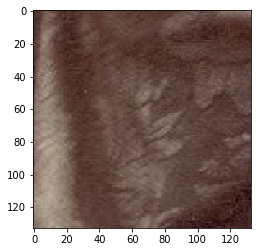

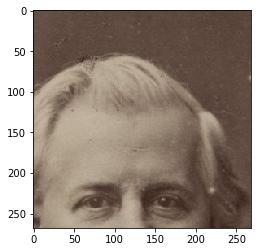

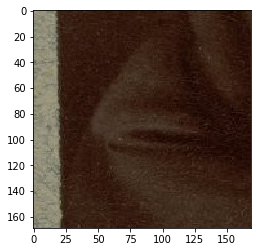

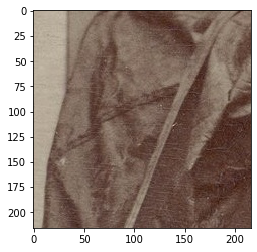

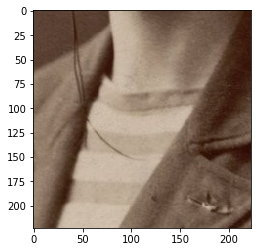

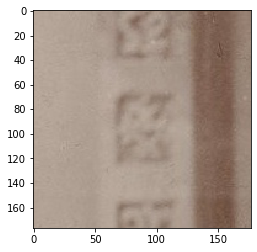

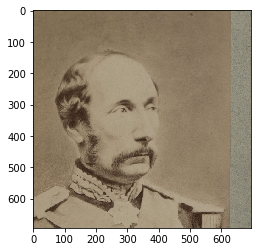

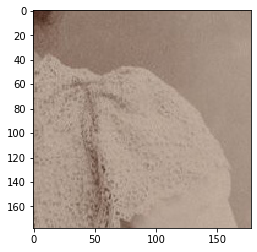

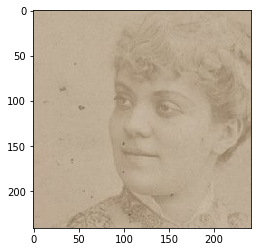

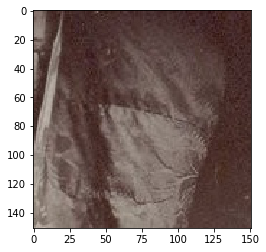

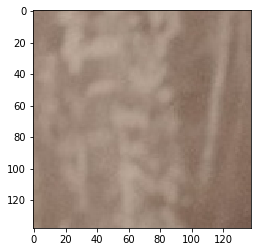

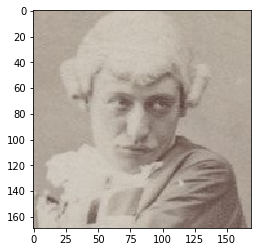

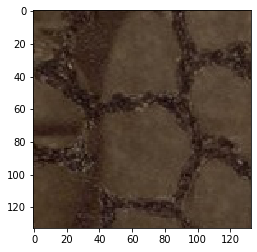

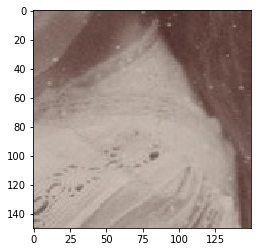

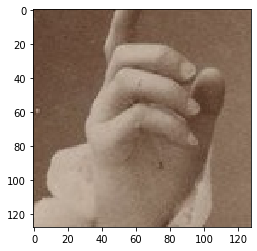

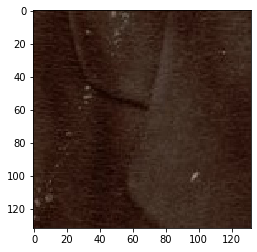

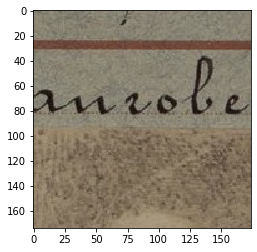

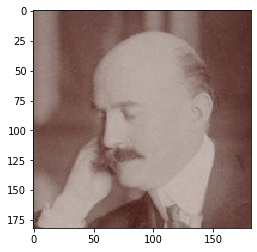

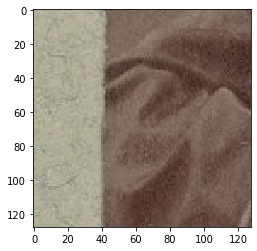

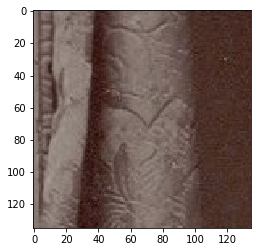

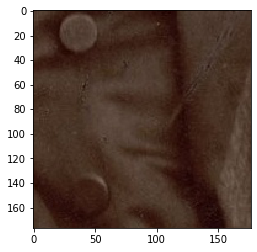

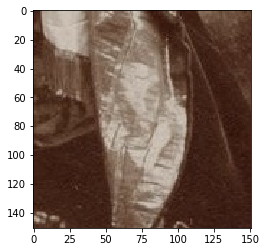

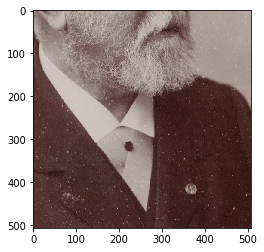

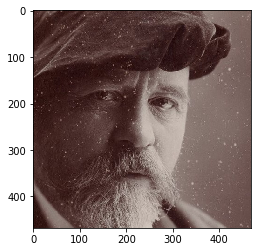

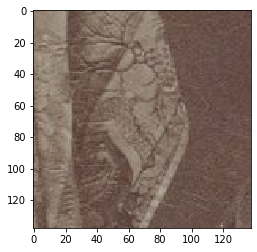

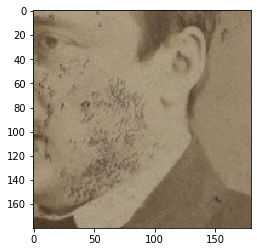

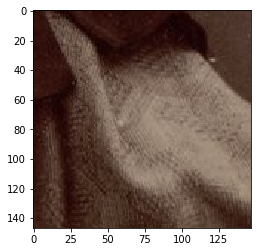

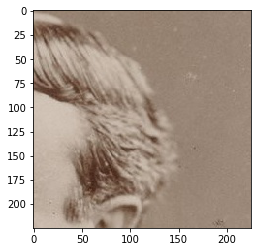

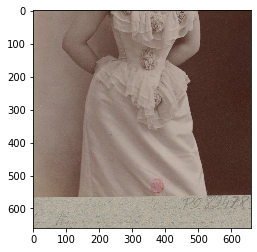

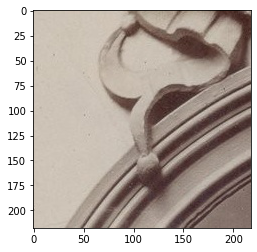

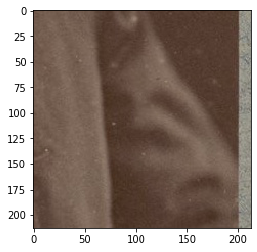

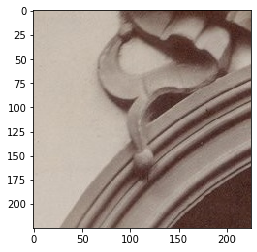

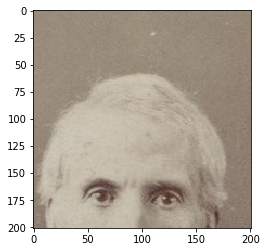

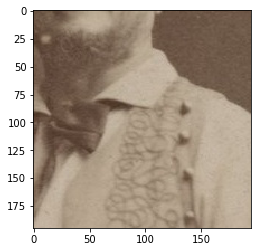

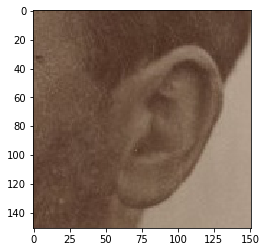

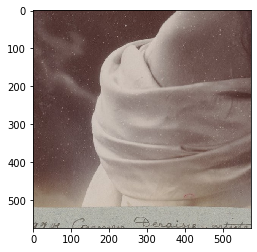

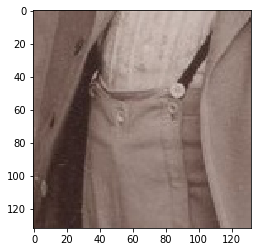

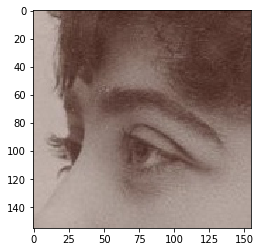

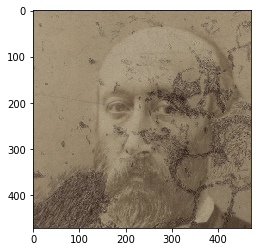

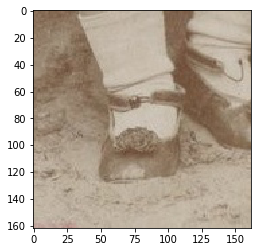

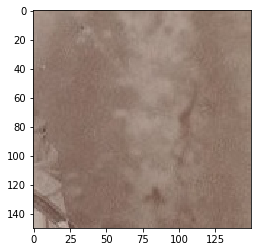

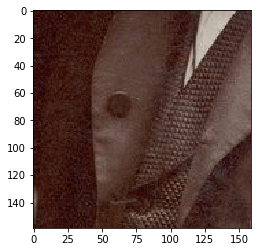

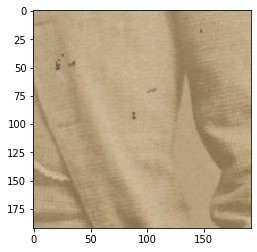

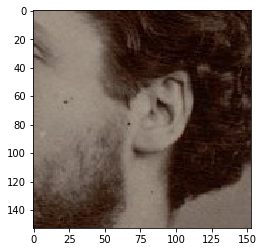

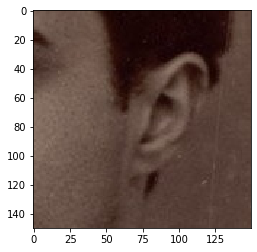

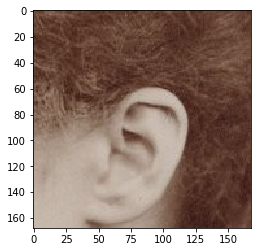

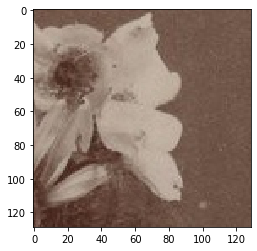

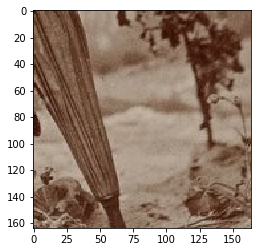

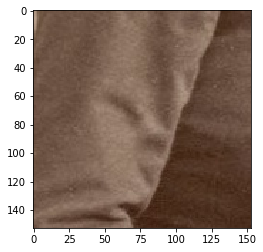

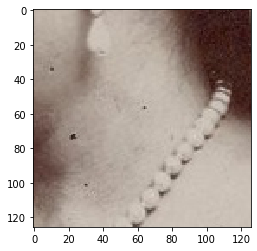

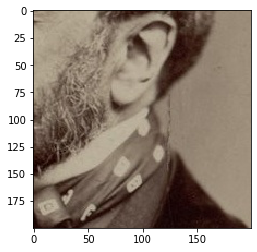

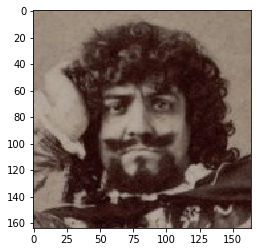

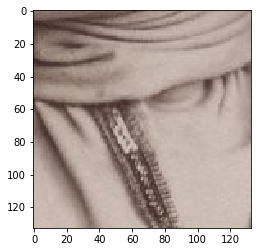

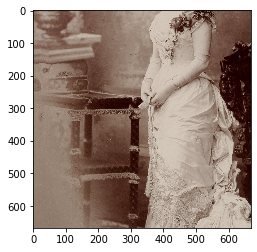

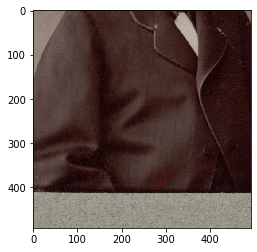

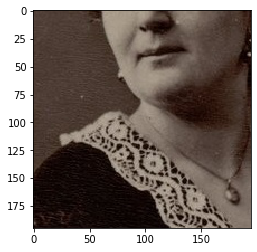

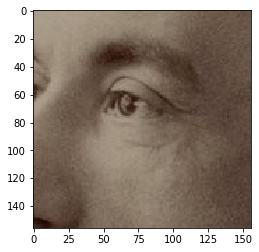

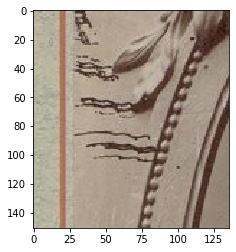

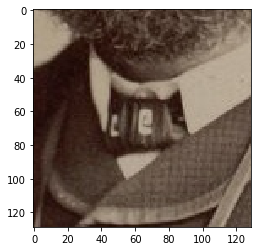

In [34]:
for pic in df_faces[df_faces.box.isna()].source.tolist():
    image = Image.open(LOCATION + pic)
    img = np.array(image)
    plt.imshow(img)
    plt.show()

In [117]:
import requests 
from io import BytesIO

def get_face_image(doc):
    output_file = '../humans_of_paris/app/static/images/'+doc
    print(output_file)
    img = get_image(doc)
    faces = model.detect_faces(img)
    if len(faces) > 0:
        print(faces[0]['confidence'])
        minx, miny, maxx, maxy = faces[0]['box']
    else:
        print(faces)
        return
    cropped = crop(img, minx-40, miny-40, minx+maxx+40, miny+maxy+40)
    plt.imshow(cropped)
    plt.show()
    cv2.imwrite(output_file,  cv2.cvtColor(cropped, cv2.COLOR_RGB2BGR))
    
def get_image(doc):
    url = 'https://gallica.bnf.fr/ark:/12148/'+doc[:-len('.png')]+'/f1.highres.jpg'
    response = requests.get(url)
    img = Image.open(BytesIO(response.content)).convert('RGB')
    img = np.array(img)
    return img

def crop(img, minx, miny, maxx, maxy):
    return img[miny:maxy, minx:maxx]

In [113]:
img = get_image('btv1b530660792.jpg')

../humans_of_paris/app/static/images/btv1b530503321.jpg
0.9999786615371704


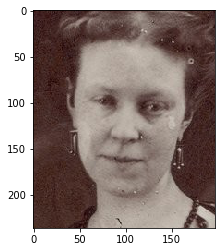

../humans_of_paris/app/static/images/btv1b53081569f.jpg
0.9999226331710815


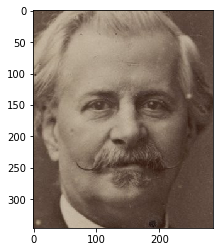

../humans_of_paris/app/static/images/btv1b530659097.jpg
0.9995711445808411


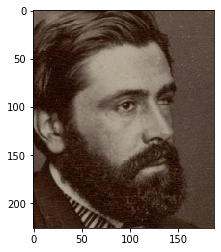

../humans_of_paris/app/static/images/btv1b53050893v.jpg
0.9999943971633911


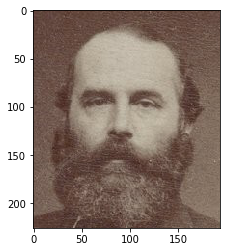

../humans_of_paris/app/static/images/btv1b530803018.jpg
0.9998552799224854


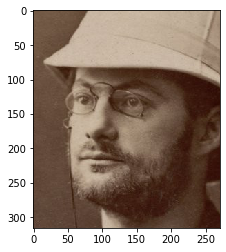

../humans_of_paris/app/static/images/btv1b53107865n.jpg
0.9890137314796448


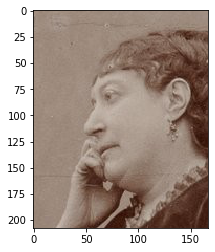

../humans_of_paris/app/static/images/btv1b53100728j.jpg
0.9734497666358948


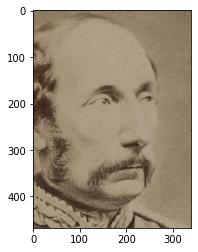

../humans_of_paris/app/static/images/btv1b531690208.jpg
0.9973297119140625


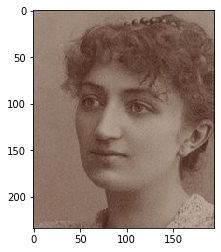

../humans_of_paris/app/static/images/btv1b531390941.jpg
[]
../humans_of_paris/app/static/images/btv1b530505193.jpg
0.9996968507766724


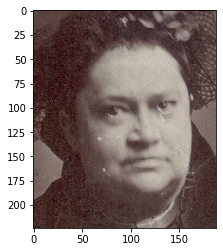

../humans_of_paris/app/static/images/btv1b53170703n.jpg
0.9997523427009583


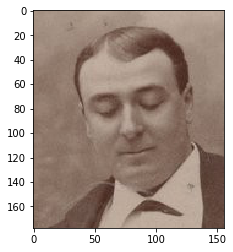

../humans_of_paris/app/static/images/btv1b53050561k.jpg
0.9986679553985596


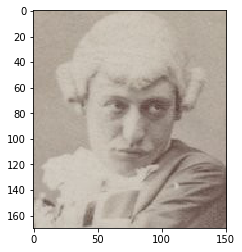

../humans_of_paris/app/static/images/btv1b531007328.jpg
0.9338212609291077


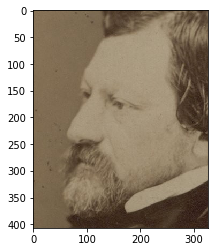

../humans_of_paris/app/static/images/btv1b53117515r.jpg
0.9973962306976318


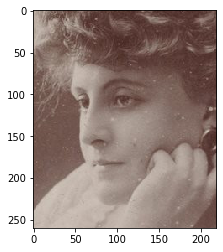

../humans_of_paris/app/static/images/btv1b53156013v.jpg
0.998819887638092


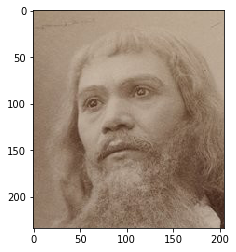

../humans_of_paris/app/static/images/btv1b53065937k.jpg
0.9961530566215515


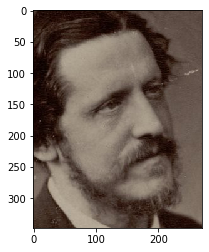

../humans_of_paris/app/static/images/btv1b53100735m.jpg
[]
../humans_of_paris/app/static/images/btv1b53118796m.jpg
[]
../humans_of_paris/app/static/images/btv1b53050620v.jpg
0.9999587535858154


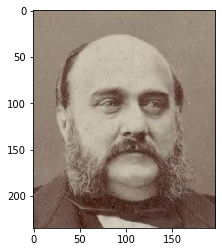

../humans_of_paris/app/static/images/btv1b53050335c.jpg
0.9996411800384521


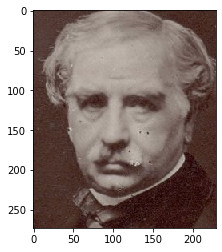

../humans_of_paris/app/static/images/btv1b531009215.jpg
0.9830151796340942


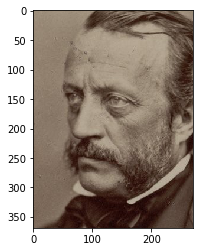

../humans_of_paris/app/static/images/btv1b531471763.jpg
[]
../humans_of_paris/app/static/images/btv1b531173635.jpg
0.8597434759140015


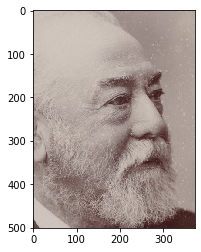

../humans_of_paris/app/static/images/btv1b531173813.jpg
0.9902386665344238


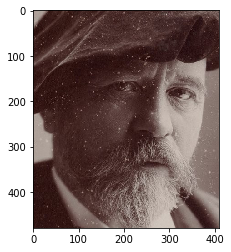

../humans_of_paris/app/static/images/btv1b53050726x.jpg
0.9948729872703552


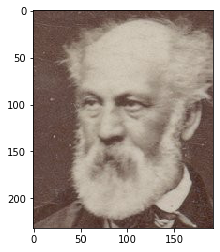

../humans_of_paris/app/static/images/btv1b531007362.jpg
[]
../humans_of_paris/app/static/images/btv1b53092363n.jpg
0.9930330514907837


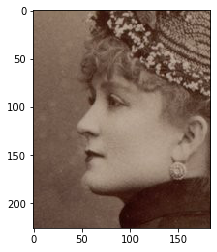

../humans_of_paris/app/static/images/btv1b53144536x.jpg
0.9998990297317505


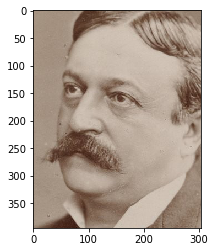

../humans_of_paris/app/static/images/btv1b531714405.jpg
0.9989498257637024


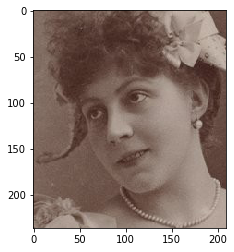

../humans_of_paris/app/static/images/btv1b53050818s.jpg
0.9994571805000305


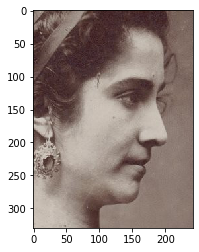

../humans_of_paris/app/static/images/btv1b53080074c.jpg
0.9813869595527649


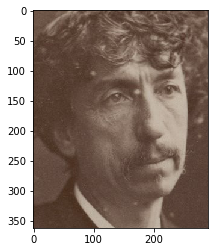

../humans_of_paris/app/static/images/btv1b530504220.jpg
0.9796293377876282


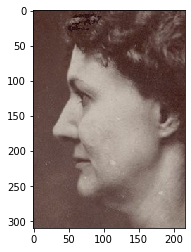

../humans_of_paris/app/static/images/btv1b53050681s.jpg
0.9959158301353455


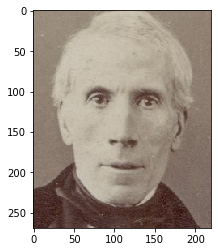

../humans_of_paris/app/static/images/btv1b53080257n.jpg
0.9998522996902466


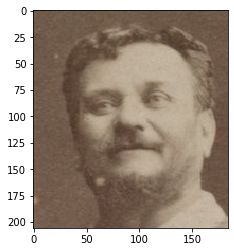

../humans_of_paris/app/static/images/btv1b53155955g.jpg
0.9959242343902588


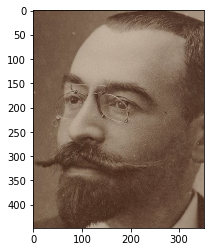

../humans_of_paris/app/static/images/btv1b531189397.jpg
[]
../humans_of_paris/app/static/images/btv1b53187715p.jpg
0.9958732724189758


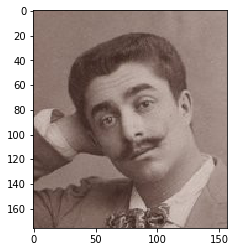

../humans_of_paris/app/static/images/btv1b53181053q.jpg
0.9607813358306885


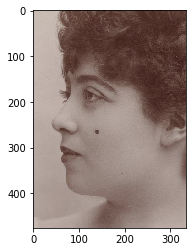

../humans_of_paris/app/static/images/btv1b53100737h.jpg
[]
../humans_of_paris/app/static/images/btv1b53146973f.jpg
0.9876407980918884


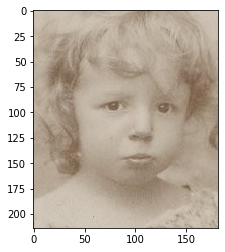

../humans_of_paris/app/static/images/btv1b531812521.jpg
0.9988166093826294


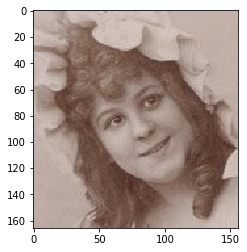

../humans_of_paris/app/static/images/btv1b53050555z.jpg
0.9975166320800781


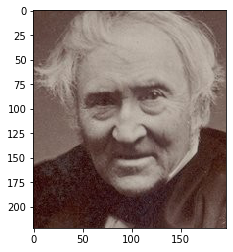

../humans_of_paris/app/static/images/btv1b53072607g.jpg
[]
../humans_of_paris/app/static/images/btv1b530663868.jpg
0.9960773587226868


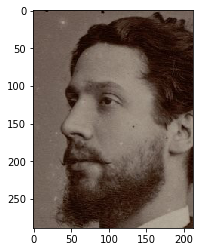

../humans_of_paris/app/static/images/btv1b530923302.jpg
0.9993624091148376


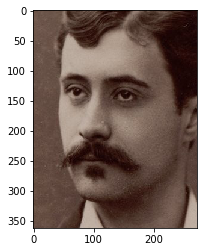

../humans_of_paris/app/static/images/btv1b531345768.jpg
0.9674455523490906


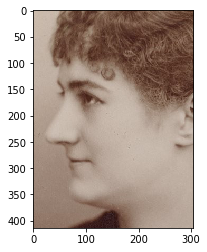

../humans_of_paris/app/static/images/btv1b53170852n.jpg
0.963352620601654


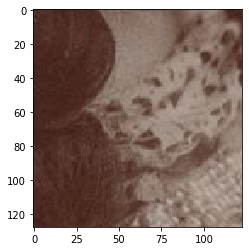

../humans_of_paris/app/static/images/btv1b53107167w.jpg
0.997126042842865


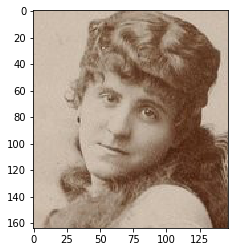

../humans_of_paris/app/static/images/btv1b53071525p.jpg
0.9966321587562561


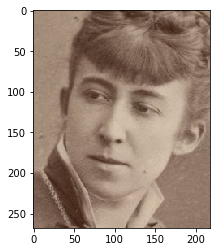

../humans_of_paris/app/static/images/btv1b530508051.jpg
0.9875806570053101


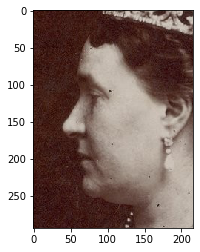

../humans_of_paris/app/static/images/btv1b53100895g.jpg
0.9969268441200256


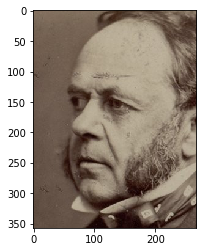

../humans_of_paris/app/static/images/btv1b530660792.jpg
0.9832639098167419


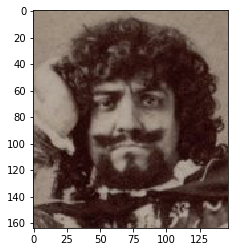

../humans_of_paris/app/static/images/btv1b53187712b.jpg
0.998781144618988


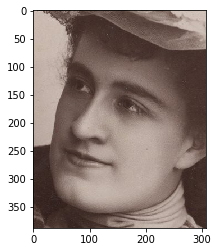

../humans_of_paris/app/static/images/btv1b53107845t.jpg
0.9991084933280945


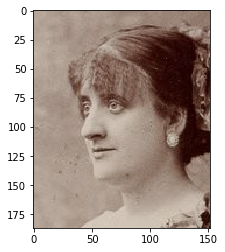

../humans_of_paris/app/static/images/btv1b53065457h.jpg
0.9673274755477905


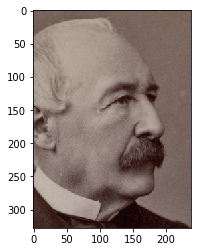

../humans_of_paris/app/static/images/btv1b530657922.jpg
0.9999996423721313


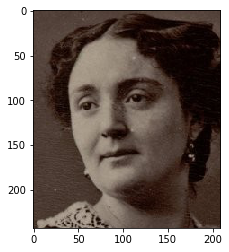

../humans_of_paris/app/static/images/btv1b530978314.jpg
0.9816473126411438


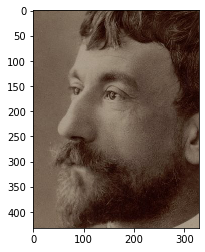

../humans_of_paris/app/static/images/btv1b53050808c.jpg
0.9999244213104248


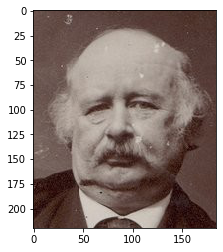

../humans_of_paris/app/static/images/btv1b531043826.jpg
0.9993190765380859


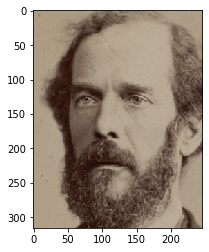

In [119]:
for source in df_faces[df_faces.box.isna()].source.tolist():
    get_face_image(source)